In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import tensorflow as tf
import os
import PIL.Image as Image

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
IMAGE_SHAPE=(224,224)
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [26]:
gold_fish=Image.open("/content/drive/MyDrive/Deep_leearning/18_Transfer_learning/goldfish.jpg").resize(IMAGE_SHAPE,3)

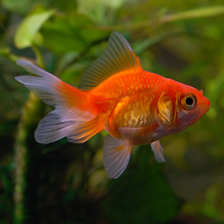

In [28]:
gold_fish

In [29]:
gold_fish=np.array(gold_fish)

In [30]:
gold_fish

array([[[ 72,  85,  18],
        [ 80,  95,  23],
        [ 89, 107,  30],
        ...,
        [ 84, 100,   1],
        [ 82,  98,   1],
        [ 79,  94,   0]],

       [[ 73,  85,  21],
        [ 83,  97,  28],
        [ 90, 108,  33],
        ...,
        [ 82,  97,   1],
        [ 80,  95,   1],
        [ 77,  92,   0]],

       [[ 73,  85,  22],
        [ 80,  94,  26],
        [ 88, 106,  33],
        ...,
        [ 81,  96,   1],
        [ 79,  94,   2],
        [ 76,  91,   1]],

       ...,

       [[ 14,  28,   4],
        [ 13,  29,   5],
        [ 13,  31,   6],
        ...,
        [ 40,  56,  10],
        [ 40,  57,   9],
        [ 41,  57,   8]],

       [[ 16,  32,   4],
        [ 15,  34,   5],
        [ 14,  35,   5],
        ...,
        [ 35,  52,  12],
        [ 36,  53,  11],
        [ 36,  53,   9]],

       [[ 17,  37,   3],
        [ 18,  39,   5],
        [ 14,  38,   3],
        ...,
        [ 29,  46,  11],
        [ 30,  47,  10],
        [ 30,  48,   9]]

In [31]:
gold_fish=gold_fish/255

In [32]:
gold_fish

array([[[0.28235294, 0.33333333, 0.07058824],
        [0.31372549, 0.37254902, 0.09019608],
        [0.34901961, 0.41960784, 0.11764706],
        ...,
        [0.32941176, 0.39215686, 0.00392157],
        [0.32156863, 0.38431373, 0.00392157],
        [0.30980392, 0.36862745, 0.        ]],

       [[0.28627451, 0.33333333, 0.08235294],
        [0.3254902 , 0.38039216, 0.10980392],
        [0.35294118, 0.42352941, 0.12941176],
        ...,
        [0.32156863, 0.38039216, 0.00392157],
        [0.31372549, 0.37254902, 0.00392157],
        [0.30196078, 0.36078431, 0.        ]],

       [[0.28627451, 0.33333333, 0.08627451],
        [0.31372549, 0.36862745, 0.10196078],
        [0.34509804, 0.41568627, 0.12941176],
        ...,
        [0.31764706, 0.37647059, 0.00392157],
        [0.30980392, 0.36862745, 0.00784314],
        [0.29803922, 0.35686275, 0.00392157]],

       ...,

       [[0.05490196, 0.10980392, 0.01568627],
        [0.05098039, 0.11372549, 0.01960784],
        [0.05098039, 0

In [34]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

(1, 1001)

In [35]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [36]:
image_label=[]
with open('/content/drive/MyDrive/Deep_leearning/18_Transfer_learning/ImageNetLabels.txt','r') as f:
  image_label=f.read().splitlines()
  



In [37]:
image_label[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [38]:
image_label[predicted_label_index]

'goldfish'

In [39]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='/content/drive/MyDrive/Deep_leearning/18_Transfer_learning', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228827136/228813984 [==============================] - 3s 0us/step


In [40]:
data_dir

'/content/drive/MyDrive/Deep_leearning/18_Transfer_learning/datasets/flower_photos'

In [41]:
import pathlib
data_dir=pathlib.Path(data_dir)

In [42]:
data_dir

PosixPath('/content/drive/MyDrive/Deep_leearning/18_Transfer_learning/datasets/flower_photos')

In [54]:
rose=list(data_dir.glob("*/*.jpg"))

In [56]:
len(rose)

3670

In [59]:
roses=list(data_dir.glob("roses/*"))

In [60]:
roses[:5]

[PosixPath('/content/drive/MyDrive/Deep_leearning/18_Transfer_learning/datasets/flower_photos/roses/14810868100_87eb739f26_m.jpg'),
 PosixPath('/content/drive/MyDrive/Deep_leearning/18_Transfer_learning/datasets/flower_photos/roses/1446090416_f0cad5fde4.jpg'),
 PosixPath('/content/drive/MyDrive/Deep_leearning/18_Transfer_learning/datasets/flower_photos/roses/15319767030_e6c5602a77_m.jpg'),
 PosixPath('/content/drive/MyDrive/Deep_leearning/18_Transfer_learning/datasets/flower_photos/roses/15032112248_30c5284e54_n.jpg'),
 PosixPath('/content/drive/MyDrive/Deep_leearning/18_Transfer_learning/datasets/flower_photos/roses/7211616670_2d49ecb3a5_m.jpg')]

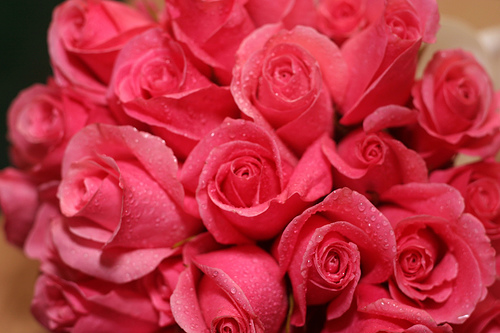

In [61]:
Image.open(roses[1])

In [67]:
import cv2
cv2.imread(str(roses[1]))

array([[[ 16,  28,  16],
        [ 16,  27,  17],
        [ 16,  27,  17],
        ...,
        [ 82, 125, 174],
        [ 81, 124, 173],
        [ 83, 123, 175]],

       [[ 16,  28,  16],
        [ 16,  28,  16],
        [ 16,  28,  16],
        ...,
        [ 85, 128, 177],
        [ 86, 126, 178],
        [ 86, 126, 178]],

       [[ 14,  27,  13],
        [ 15,  27,  15],
        [ 15,  27,  15],
        ...,
        [ 86, 129, 180],
        [ 88, 128, 180],
        [ 87, 128, 177]],

       ...,

       [[ 67, 106, 168],
        [ 67, 106, 168],
        [ 67, 107, 166],
        ...,
        [ 70,  44, 184],
        [ 67,  44, 183],
        [ 66,  43, 182]],

       [[ 68, 107, 169],
        [ 67, 106, 168],
        [ 67, 107, 166],
        ...,
        [ 81,  55, 193],
        [ 81,  55, 193],
        [ 83,  57, 195]],

       [[ 70, 108, 172],
        [ 68, 107, 169],
        [ 68, 107, 169],
        ...,
        [ 96,  69, 203],
        [ 97,  69, 206],
        [ 99,  71, 208]]

In [62]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [63]:
flowers_images_dict={
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}

In [64]:
for images_name,images in flowers_images_dict.items():
  for image in images:
    

roses
daisy
dandelion
sunflowers
tulips


In [68]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [69]:
X = np.array(X)
y = np.array(y)

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [71]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [73]:
X_train[0].shape

(224, 224, 3)

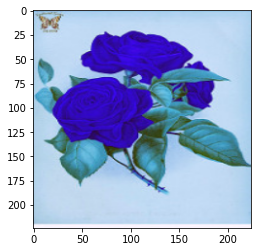

In [75]:
plt.imshow(X[0])


In [77]:
X[0].shape

(224, 224, 3)

In [86]:
predict=classifier.predict(np.array([X[0],X[1]]))
predict=[np.argmax(i) for i in predict]
predict

[722, 795]

In [94]:
for i in predict:
  print(image_label[i])

pillow
shower curtain


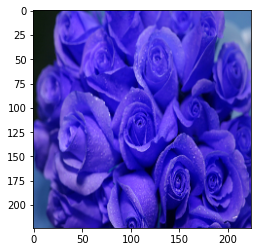

In [95]:
plt.imshow(X[1])

In [96]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [97]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])


In [98]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [99]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 13s 81ms/step - loss: 0.8187 - acc: 0.6915
Epoch 2/5
86/86 [==============================] - 7s 81ms/step - loss: 0.4150 - acc: 0.8485
Epoch 3/5
86/86 [==============================] - 7s 81ms/step - loss: 0.3215 - acc: 0.8946
Epoch 4/5
86/86 [==============================] - 7s 80ms/step - loss: 0.2659 - acc: 0.9208
Epoch 5/5
86/86 [==============================] - 7s 81ms/step - loss: 0.2268 - acc: 0.9346


In [100]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 4s 101ms/step - loss: 0.3874 - acc: 0.8617


[0.38742756843566895, 0.8616557717323303]